In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization

print("Loaded required libraries...")

Loaded required libraries...


In [2]:
fpath = "plantvillage/"
random_seed = 111

categories = os.listdir(fpath)
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus'] 

No. of categories =  15


In [3]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category)[:300]:
            file_ext = image_name.split(".")[-1]
            if (file_ext.lower() == "jpg") or (file_ext.lower() == "jpeg"):
                #print(f"\nCategory = {category}, Image name = {image_name}")
                img = cv2.imread(fpath+"/"+category+"/"+image_name)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                img_array = Image.fromarray(img, 'RGB')

                #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
                resized_img = img_array.resize((227, 227))

                img_lst.append(np.array(resized_img))

                labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  4352 
No. of labels loaded =  4352
<class 'list'> <class 'list'>


In [4]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (4352, 227, 227, 3) 
Labels shape =  (4352,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


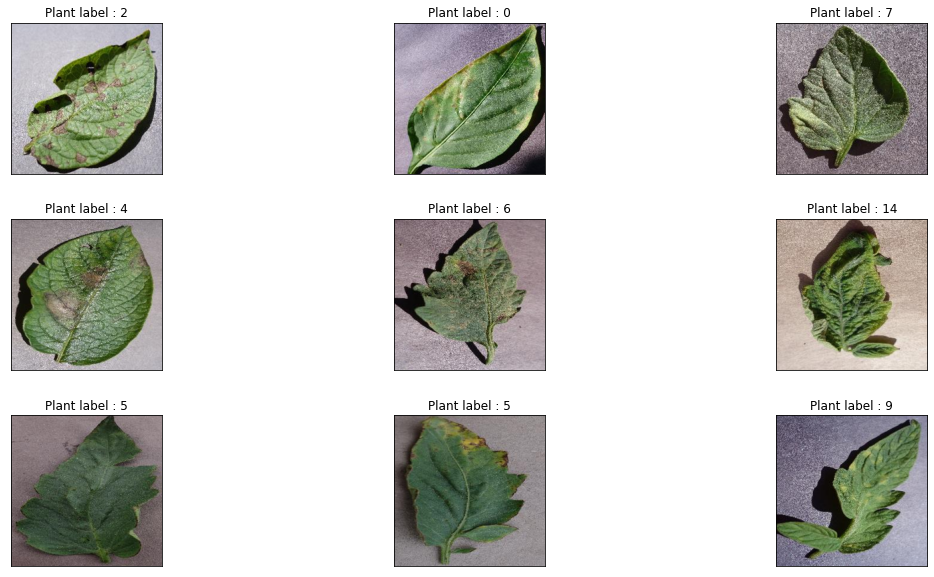

In [5]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Plant label : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [6]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 4349 4350 4351]

'n' values after shuffling =  [3063 2450 3854 ... 4182 2004 3924]


In [7]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (4352, 227, 227, 3) 
Labels shape after shuffling =  (4352,)


In [8]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (4352, 227, 227, 3)


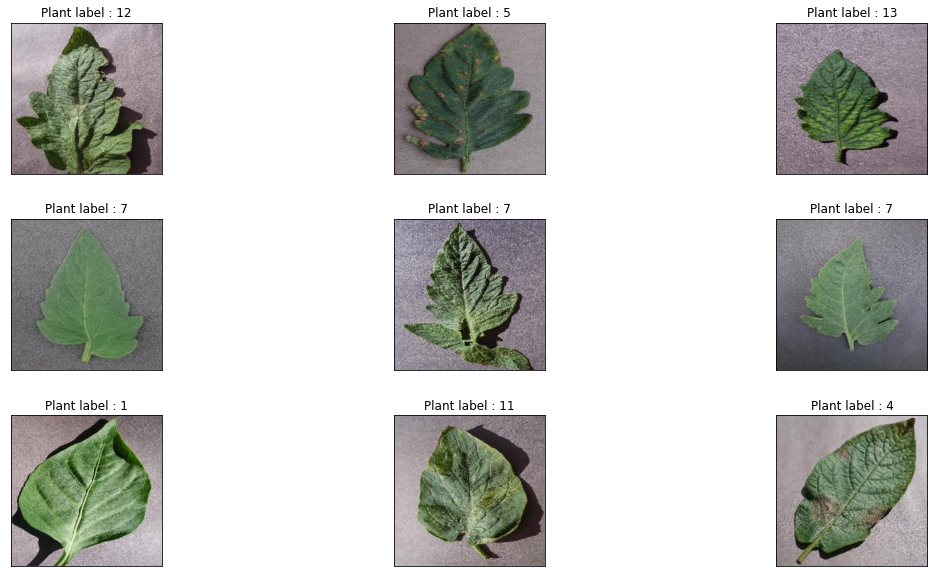

In [9]:
display_rand_images(images, labels)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (3481, 227, 227, 3)
y_train shape =  (3481,)

x_test shape =  (871, 227, 227, 3)
y_test shape =  (871,)


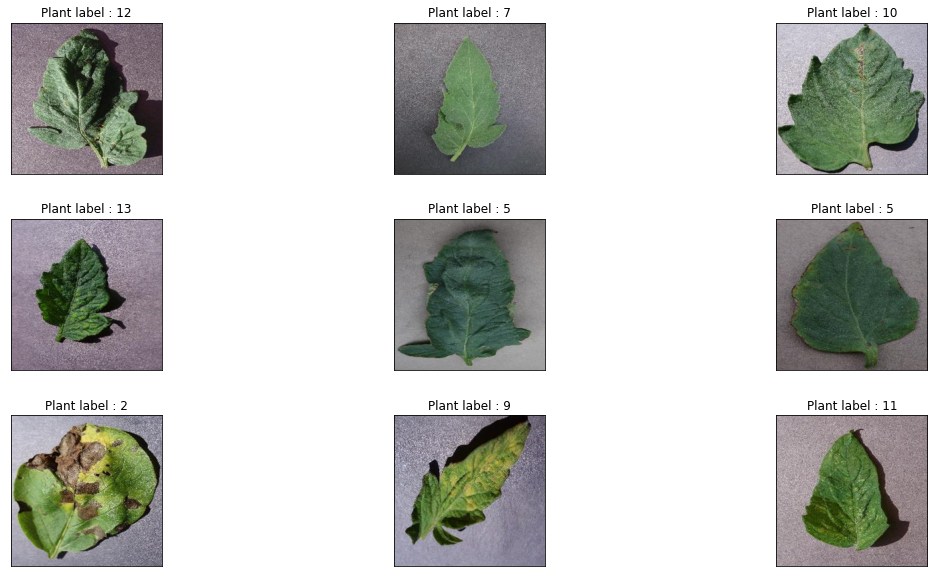

In [11]:
display_rand_images(x_train, y_train)

In [12]:
model = Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(15,activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 384)         8

In [14]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [15]:
history = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
109/109 [==============================] - 153s 1s/step - loss: 3.0488 - accuracy: 0.1870
Epoch 2/100
109/109 [==============================] - 110s 1s/step - loss: 1.9665 - accuracy: 0.3929
Epoch 3/100
109/109 [==============================] - 108s 988ms/step - loss: 1.6118 - accuracy: 0.4907
Epoch 4/100
109/109 [==============================] - 107s 984ms/step - loss: 1.3536 - accuracy: 0.5591
Epoch 5/100
109/109 [==============================] - 108s 992ms/step - loss: 1.1720 - accuracy: 0.6192
Epoch 6/100
109/109 [==============================] - 106s 973ms/step - loss: 0.9921 - accuracy: 0.6752
Epoch 7/100
109/109 [==============================] - 114s 1s/step - loss: 0.8504 - accuracy: 0.7193
Epoch 8/100
109/109 [==============================] - 140s 1s/step - loss: 0.7689 - accuracy: 0.7385
Epoch 9/100
109/109 [==============================] - 153s 1s/step - loss: 0.7102 - accuracy: 0.7527
Epoch 10/100
109/109 [==============================] - 158s 1s/step -

In [23]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


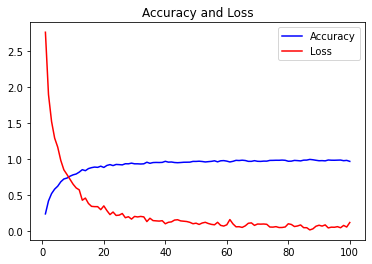

In [31]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Accuracy')
plt.plot(epochs, loss, 'r', label='Loss')
plt.title('Accuracy and Loss')
plt.legend()
plt.show()

In [2]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(history, x_test, y_test,
                                 display_labels=categories,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

NameError: name 'history' is not defined

In [16]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

28/28 [==============================] - 7s 163ms/step - loss: 0.6380 - accuracy: 0.8588
0.6379897594451904 0.8587830066680908


In [17]:
pred = model.predict(x_test)

pred.shape

(871, 15)

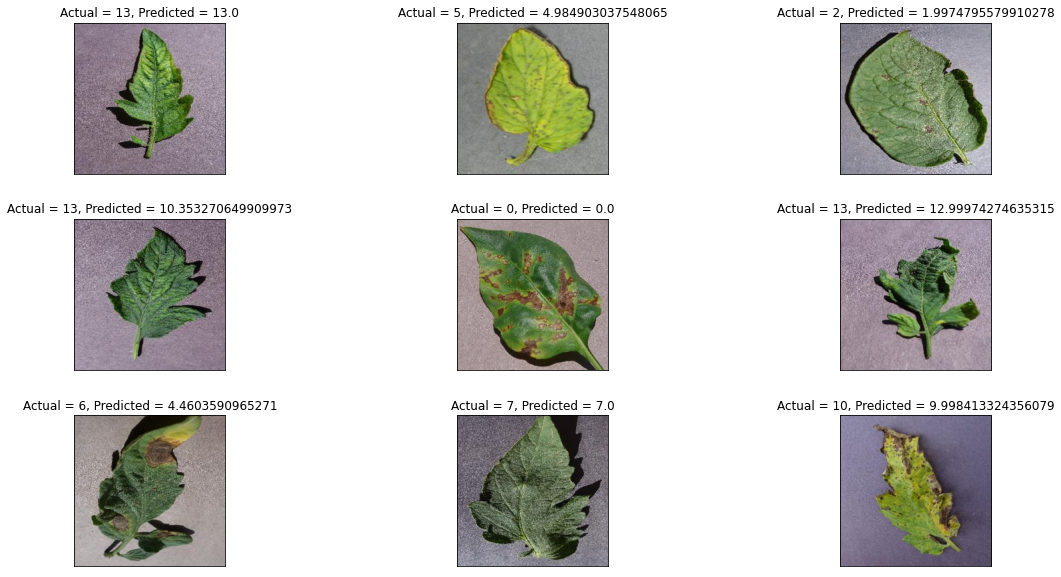

In [19]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

In [20]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [21]:
KERAS_MODEL_NAME = "tf_model_plant_disease.h5"

In [22]:
model.save(KERAS_MODEL_NAME)

In [41]:
TF_LITE_MODEL_FILE_NAME = "plant_model.tflite"

In [42]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_converter.allow_custom_ops = True
tf_lite_converter.optimizations = [tf.lite.Optimize.DEFAULT]
tf_lite_converter.target_spec.supported_types = [tf.float16]
tf_lite_converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]
tf_lite_converter.experimental_new_converter = True
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmpn3bvrit6\assets
INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmpn3bvrit6\assets


In [43]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

115405992

In [44]:
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "MB")

File size: 110.06 Megabytes


In [45]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [  1 227 227   3]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 15]
Output Type: <class 'numpy.float32'>


In [46]:
images.dtype

dtype('float32')

In [50]:
np_images_test = np.expand_dims(images[0], axis=0).astype(np.float32)
input_data_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_data_shape), dtype=np.float32)

In [51]:
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)

Prediction results shape: (1, 15)


In [55]:
reshaped_labels = labels.reshape(4352,1).T
print(tflite_model_predictions)

[[1.5942326e-11 1.1591401e-11 2.2737019e-07 2.6778164e-09 3.7559760e-09
  1.0260261e-05 1.7781708e-02 9.5854253e-01 1.4037944e-02 7.3823950e-04
  1.2982384e-09 8.8769291e-03 1.4242753e-06 1.0819656e-05 2.2693943e-08]]


In [57]:
tflite_pred_dataframe = pd.DataFrame(tflite_model_predictions)
tflite_pred_dataframe.columns = categories
tflite_pred_dataframe.head()

Pepper__bell___Bacterial_spot  Pepper__bell___healthy  \
0                   1.594233e-11            1.159140e-11   

   Potato___Early_blight  Potato___healthy  Potato___Late_blight  \
0           2.273702e-07      2.677816e-09          3.755976e-09   

   Tomato_Bacterial_spot  Tomato_Early_blight  Tomato_healthy  \
0                0.00001             0.017782        0.958543   

   Tomato_Late_blight  Tomato_Leaf_Mold  Tomato_Septoria_leaf_spot  \
0            0.014038          0.000738               1.298238e-09   

   Tomato_Spider_mites_Two_spotted_spider_mite  Tomato__Target_Spot  \
0                                     0.008877             0.000001   

   Tomato__Tomato_mosaic_virus  Tomato__Tomato_YellowLeaf__Curl_Virus  
0                     0.000011                           2.269394e-08